In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # module search
%matplotlib inline
import cv2 as cv

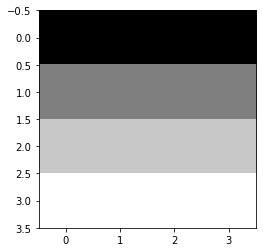

In [18]:
a = np.asarray([[0,0,0,0]
                ,[127,127,127,127]
                ,[200,200,200,200]
                ,[255,255,255,255]],dtype='uint8')
plt.imshow(a,cmap='gray')

[[  5   5   5   5]
 [132 132 132 132]
 [205 205 205 205]
 [  4   4   4   4]]


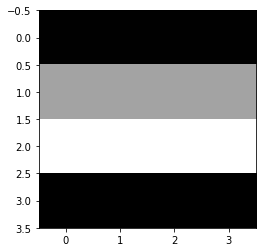

In [28]:
b = a + 5 #overflow로 인해 255 + 5 = 4 
plt.imshow(b,cmap ='gray')
print(b)

(4, 4, 3)


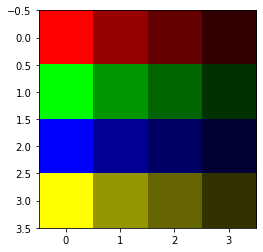

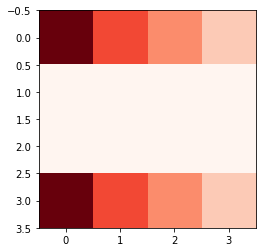

In [68]:
r = np.asarray([[255,150,100,50]
                ,[0,0,0,0]
                ,[0,0,0,0]
                ,[255,150,100,50]],dtype='uint8')

g = np.asarray([[0,0,0,0]
                ,[255,150,100,50]
                ,[0,0,0,0]
                ,[255,150,100,50]],dtype='uint8')

b = np.asarray([[0,0,0,0]
                ,[0,0,0,0]
                ,[255,150,100,50]
                ,[0,0,0,0]],dtype='uint8')

colors = np.dstack([r,g,b])# 물리적으로 채널을 2개로 설정하면 컬러 색상을 표현 가능하지만 컴퓨터 상에서 가정을 할 수 없어 3 channel을 스택해서 표현해야된다
print(colors.shape) # color 영상은 항상 (,,3)으로 나타남
plt.imshow(colors)
plt.show()#overwrite###
plt.imshow(r,cmap='Reds')


In [69]:
black=np.zeros((4,4),dtype='uint8')#dtype을 uint8로 넣는 이유 - 워래 default값이 uint32이므로 메모리 많이 차지함.
black

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

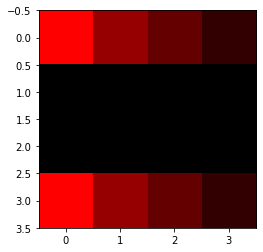

In [70]:
red = np.dstack([r,black,black])
plt.imshow(red)

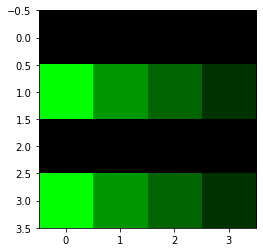

In [71]:
green = np.dstack([black,g,black])
plt.imshow(green)

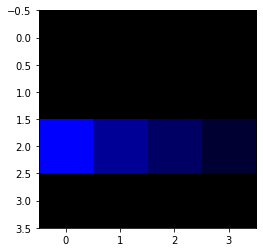

In [72]:
blue = np.dstack([black,black,b])
plt.imshow(blue)

(4, 16, 3)


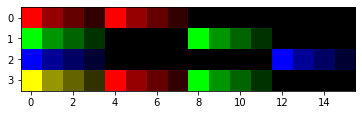

In [75]:
all = np.hstack([np.dstack([r,g,b]),red,green,blue]) #행렬 데이터 옆으로 묶어서 표현하는 경우 생김.
plt.imshow(all)
print(all.shape)

(801, 801, 3)


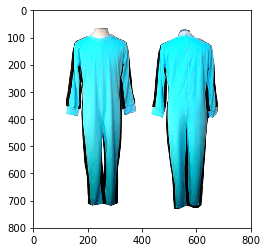

In [106]:
img = cv.imread("Lee.jpg") #numpy 타입으로 return
print(img.shape)
plt.imshow(img)#RGB가 아닌 BGR로 인식


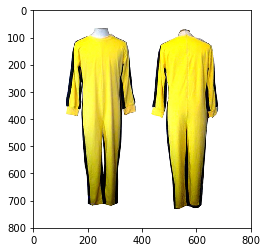

In [92]:
bb = img[:,:,0]
gg = img[:,:,1]
rr = img[:,:,2]
original = np.dstack([rr,gg,bb])
plt.imshow(original)

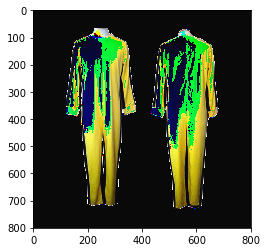

In [98]:
rr2 = rr + 10
gg2 = gg  + 10
bb2 = bb + 10
original2 = np.dstack([rr2,gg2,bb2])
plt.imshow(original2)

True

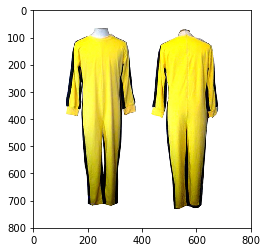

In [103]:
original3 = cv.cvtColor(img, cv.COLOR_BGR2RGB) #더 쉬운 방법
plt.imshow(original3)
cv.imwrite("result.jpg",original)

<img src = 'result.jpg' width =100>

In [109]:
negative = np.zeros((801, 801, 3))
negative.fill(255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


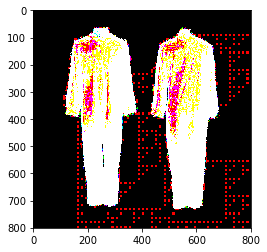

In [110]:
negative = negative - img
plt.imshow(negative)

h - 명도 s - 채도 v - intensity

In [114]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

result = img.copy()# 값이 복사가 되려면 copy를 해줘야함. 안하게 되면 그 객체를 표시 지칭하는
print(result.shape)
print(result.shape[0])

(801, 801, 3)
801


a = 8 
b = 8 
파이썬에서 총 4바이트 공간 용량 차지함


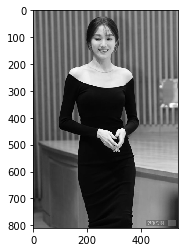

In [128]:
celeb = cv.imread("celebrity.jpg")
hsv = cv.cvtColor(celeb,cv.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

result = celeb.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        col = (int(celeb[r,c,0])+int(celeb[r,c,1])+int(celeb[r,c,2]))/3 # 합은 255을 넘어가므로 합에서부터 overflow가 나타남
        #굳이 모든 부분을 integer로 형변환 필요가 없다 왜냐하면 덧셈 연산시 자동으로 형변환이 이루어진다.
        result[r,c,0] = col;
        result[r,c,1] = col;
        result[r,c,2] = col;
        hsv = result
        
plt.imshow(hsv) #overflow가 일어남

In [149]:
people = cv.imread("people.jpg")
print(people.shape)
hsv = cv.cvtColor(people,cv.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
result = people.copy()
mask = people.copy()

(334, 596, 3)


In [143]:
h.shape

(334, 596)

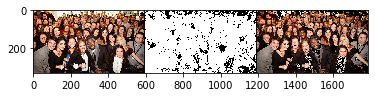

In [150]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
#         print(r,c)
        if h[r,c]>=0 and h[r,c] <= 20 :
            result[r,c,0] = people[r,c,0]
            result[r,c,1] = people[r,c,1]
            result[r,c,2] = people[r,c,2]
            mask[r,c,0]=255
            mask[r,c,1]=255
            mask[r,c,2]=255
        else:
#             col = (int(people[r,c,0])+int(people[r,c,1])+int(people[r,c,2]))/3
            result[r,c,0] = 0;
            result[r,c,1] = 0;
            result[r,c,2] = 0;
            mask[r,c,0]=0
            mask[r,c,1]=0
            mask[r,c,2]=0
all_ = np.hstack([people,mask,result])
plt.imshow(cv.cvtColor(all_,cv.COLOR_BGR2RGB)) #overflow가 일어남
# Lower = np.array([0,48,80],dtype='uint8')
# Upper = np.array([20,255,255],dtype='uint8')

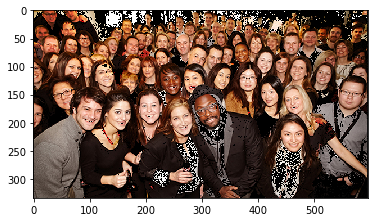

In [151]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
#         print(r,c)
        if h[r,c]>=0 and h[r,c] <= 20 :
            result[r,c,:] = people[r,c,:]
            
        else:
#             col = (int(people[r,c,0])+int(people[r,c,1])+int(people[r,c,2]))/3
            result[r,c,:] = 0;
            
        
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

## 히스토그램

(150, 194, 3)


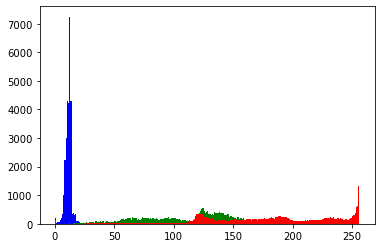

In [164]:
train = cv.imread("patch.png")
print(train.shape)
h,s,v = cv.split(cv.cvtColor(train,cv.COLOR_BGR2HSV)) # 슬라이싱 보다 연산이 빠른 방법

plt.hist(h.ravel(),256,[0,256],color='blue')# ravel() - 2차원 행렬을 1차원으로 변경해주는 함수
plt.hist(s.ravel(),256,[0,256],color='green')
plt.hist(v.ravel(),256,[0,256],color='red')
plt.show()

(262, 315, 3)


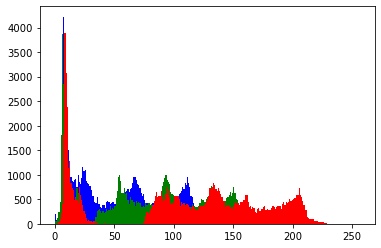

In [166]:
train = cv.imread("patch2.png")
print(train.shape)
h,s,v = cv.split(train) # 슬라이싱 보다 연산이 빠른 방법

plt.hist(b.ravel(),256,[0,256],color='blue')# ravel() - 2차원 행렬을 1차원으로 변경해주는 함수
plt.hist(g.ravel(),256,[0,256],color='green')
plt.hist(r.ravel(),256,[0,256],color='red')
plt.show()

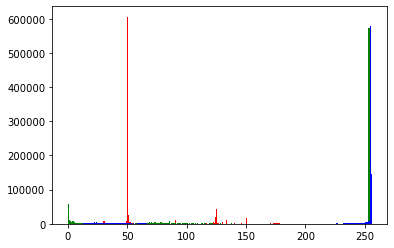

In [190]:
trump = cv.imread("trump.jpg")
h,s,v = cv.split(cv.cvtColor(train,cv.COLOR_BGR2HSV))

plt.hist(h.ravel(),256,[0,256],color='red')# ravel() - 2차원 행렬을 1차원으로 변경해주는 함수
plt.hist(s.ravel(),256,[0,256],color='green')
plt.hist(v.ravel(),256,[0,256],color='blue')
plt.show()

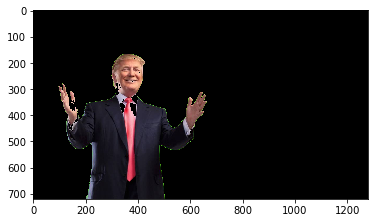

In [188]:
trump = cv.imread("trump.jpg")
h,s,v = cv.split(trump)
result =trump.copy()

for r in range(g.shape[0]):
    for c in range(g.shape[1]):
        if g[r,c] >= 200 and g[r,c] <= 255:
            result[r,c,:] = 0    
        else:
#             col = (int(people[r,c,0])+int(people[r,c,1])+int(people[r,c,2]))/3
            result[r,c,:] = trump[r,c,:];
            
        
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

(array([5.80860e+04, 1.00900e+03, 2.09500e+03, 1.90600e+03, 2.48100e+03,
       2.30300e+03, 2.63000e+03, 2.52200e+03, 3.05600e+03, 1.87500e+03,
       1.63300e+03, 1.32600e+03, 8.12000e+02, 5.51000e+02, 2.26000e+02,
       9.48000e+02, 2.02000e+02, 1.64000e+02, 3.40000e+02, 1.60000e+02,
       3.37000e+02, 1.55000e+02, 1.00000e+02, 1.19400e+03, 2.70000e+02,
       2.49000e+02, 2.48000e+02, 1.84000e+02, 1.11000e+02, 6.90000e+01,
       8.11400e+03, 5.00000e+01, 1.08000e+02, 2.96000e+02, 2.91000e+02,
       5.71000e+02, 1.13500e+03, 1.41000e+02, 1.46100e+03, 7.06000e+02,
       5.84000e+02, 4.09000e+02, 5.78000e+02, 8.15000e+02, 5.17000e+02,
       1.54800e+03, 2.04200e+03, 2.17300e+03, 3.33900e+03, 8.61500e+03,
       6.05852e+05, 2.51980e+04, 5.15200e+03, 2.30500e+03, 1.17900e+03,
       4.49000e+02, 4.36000e+02, 3.35000e+02, 3.58000e+02, 3.76000e+02,
       5.84000e+02, 1.20000e+02, 1.39000e+02, 1.79000e+02, 1.19000e+02,
       3.74000e+02, 2.88000e+02, 1.74000e+02, 3.68000e+02, 1.63

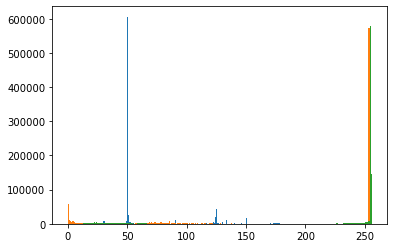

In [208]:
v
# print(value)
print(hh)

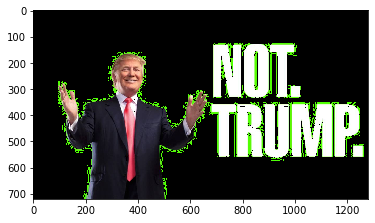

In [196]:
trump = cv.imread("trump.jpg")
h,s,v = cv.split(cv.cvtColor(trump,cv.COLOR_BGR2HSV))
result =trump.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r,c] ==50:
            result[r,c,:] = 0    
        else:
#             col = (int(people[r,c,0])+int(people[r,c,1])+int(people[r,c,2]))/3
            result[r,c,:] = trump[r,c,:];
            
        
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

In [8]:
trump = cv.imread("trump.jpg")
h,s,v = cv.split(cv.cvtColor(trump,cv.COLOR_BGR2HSV))
result =trump.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if np.array_equal(trump[r,c,:]==[vh,vs,vv]):
            result[r,c,:] = 0    
        else:
#             col = (int(people[r,c,0])+int(people[r,c,1])+int(people[r,c,2]))/3
            result[r,c,:] = trump[r,c,:];
            
        
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

NameError: name 'vh' is not defined

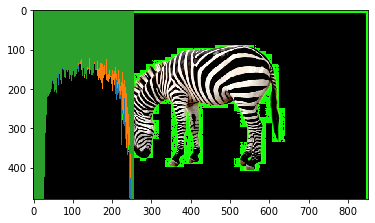

In [24]:
zebra = cv.imread("zebra.jpg")
b,g,r = cv.split(zebra)
result =zebra.copy()
hb = plt.hist(b.ravel(),256,[0,256])#tuple객체로 반환
hg= plt.hist(g.ravel(),256,[0,256])
hr = plt.hist(r.ravel(),256,[0,256])
max_b =(np.where(hb[0]==np.max(hb[0])))[0][0]
max_g =(np.where(hg[0]==np.max(hg[0])))[0][0]
max_r =(np.where(hr[0]==np.max(hr[0])))[0][0]
for r in range(zebra.shape[0]):
    for c in range(zebra.shape[1]):
        if np.array_equal(result[r,c,:],[max_b,max_g,max_r]):
            result[r,c,:] = 0


plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))

In [20]:
(np.where(hb[0]==np.max(hb[0])))

(array([9], dtype=int64),)

In [21]:
(np.where(hb[0]==np.max(hb[0])))[0]

array([9], dtype=int64)

In [22]:
(np.where(hb[0]==np.max(hb[0])))[0][0]

9